In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/Users/kishorecheruku/Downloads/MathsnStats_shoe_sale_analysis_resources/shoe_sales.csv")
data.head(10)

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0
5,9/3/2023,Adidas,11.0
6,9/4/2023,Nike,22.0
7,9/4/2023,Adidas,13.0
8,9/5/2023,Nike,20.0
9,9/5/2023,Adidas,10.0


In [18]:
data[data['sold_qty'] == data['sold_qty'].mode()[0]]

,date,brand,sold_qty
11,9/6/2023,Adidas,15.0
35,9/18/2023,Adidas,15.0
36,9/19/2023,Nike,15.0
46,9/24/2023,Nike,15.0
55,9/28/2023,Adidas,15.0


In [20]:
data.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


In [64]:
# Convert string values to numeric
data['sold_qty'] = pd.to_numeric(data['sold_qty'], errors='coerce')

# Now sort the values
# quantity = data['sold_qty'].sort_values()

# Calculate quantile on the numeric column
q1 = data['sold_qty'].quantile(0.25, interpolation="linear")
print(q1)

q3 = data['sold_qty'].quantile(0.75, interpolation='linear')
print(q3)

iqr = q3 - q1
print(iqr)

lower_bound = q1 - 1.5 * iqr
print(lower_bound)
high_bound = q3 + 1.5 * iqr
print(high_bound)
outliers = data['sold_qty'][
    (data['sold_qty'] < lower_bound) | (data['sold_qty'] > high_bound)
]
print(outliers.values)

# Create a mask for clean data instead of creating a separate Series
clean_data_mask = (data['sold_qty'] >= lower_bound) & (data['sold_qty'] <= high_bound)

# Apply the mask to the entire dataframe
clean_data = data[clean_data_mask]

# If you just want to see the sold_qty column of clean data:
print(clean_data)

12.25
19.75
7.5
1.0
31.0
[689.]
         date   brand  sold_qty
0    9/1/2023    Nike      24.0
1    9/1/2023  Adidas      14.0
2    9/2/2023    Nike      21.0
3    9/2/2023  Adidas      12.0
4    9/3/2023    Nike      18.0
5    9/3/2023  Adidas      11.0
6    9/4/2023    Nike      22.0
7    9/4/2023  Adidas      13.0
8    9/5/2023    Nike      20.0
9    9/5/2023  Adidas      10.0
10   9/6/2023    Nike      23.0
11   9/6/2023  Adidas      15.0
12   9/7/2023    Nike      19.0
13   9/7/2023  Adidas      16.0
14   9/8/2023    Nike      17.0
15   9/8/2023  Adidas       8.0
16   9/9/2023    Nike      25.0
17   9/9/2023  Adidas      17.0
18  9/10/2023    Nike      14.0
19  9/10/2023  Adidas       7.0
20  9/11/2023    Nike      23.0
21  9/11/2023  Adidas       9.0
22  9/12/2023    Nike      19.0
24  9/13/2023    Nike      16.0
25  9/13/2023  Adidas      11.0
26  9/14/2023    Nike      22.0
27  9/14/2023  Adidas      13.0
28  9/15/2023    Nike      17.0
29  9/15/2023  Adidas      10.0
30  9/16

In [71]:
clean_feature = data['sold_qty'].clip(
    data['sold_qty'].quantile(0.05),
    data['sold_qty'].quantile(0.95)
)
data['clean_sold_qty'] = clean_feature
data.dropna()

,date,brand,sold_qty,clean_sold_qty
0,9/1/2023,Nike,24.0,24.0
1,9/1/2023,Adidas,14.0,14.0
2,9/2/2023,Nike,21.0,21.0
3,9/2/2023,Adidas,12.0,12.0
4,9/3/2023,Nike,18.0,18.0
5,9/3/2023,Adidas,11.0,11.0
6,9/4/2023,Nike,22.0,22.0
7,9/4/2023,Adidas,13.0,13.0
8,9/5/2023,Nike,20.0,20.0
9,9/5/2023,Adidas,10.0,10.0


In [72]:
# Create a new column with the clipped values
clean_feature = data['sold_qty'].clip(
    data['sold_qty'].quantile(0.05),
    data['sold_qty'].quantile(0.95)
)

# Either assign it to a new column
data['clean_sold_qty'] = clean_feature

# Or if you want to replace the original column
# data['sold_qty'] = clean_feature

# If you want to access the cleaned values, use:
# clean_feature  # This will show the Series with clipped values

#### Nike Analysis

In [77]:
data[data['brand'] == 'Nike'].fillna(0)

,date,brand,sold_qty,clean_sold_qty
0,9/1/2023,Nike,24.0,24.0
2,9/2/2023,Nike,21.0,21.0
4,9/3/2023,Nike,18.0,18.0
6,9/4/2023,Nike,22.0,22.0
8,9/5/2023,Nike,20.0,20.0
10,9/6/2023,Nike,23.0,23.0
12,9/7/2023,Nike,19.0,19.0
14,9/8/2023,Nike,17.0,17.0
16,9/9/2023,Nike,25.0,24.0
18,9/10/2023,Nike,14.0,14.0


In [92]:
nike_data = data[data['brand'] == 'Nike']
nike_data.describe()
val = data['sold_qty'].median()
nike_data.fillna(val, inplace=True)
# nike_data[nike_data['sold_qty'].isnull()]
nike_data.describe()

/var/folders/39/mvl07frs18l0n9lf92sybq1r0000gn/T/ipykernel_60553/1059388366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nike_data.fillna(val, inplace=True)


,sold_qty,clean_sold_qty
count,30.000000,30.000000
mean,19.400000,19.366667
std,3.146974,3.090400
min,14.000000,14.000000
25%,17.000000,17.000000
50%,19.000000,19.000000
75%,22.000000,22.000000
max,25.000000,24.000000


#### Adidas Analasys

In [96]:
adidas_data = data[data['brand'] == 'Adidas']
adidas_data.describe()

,sold_qty,clean_sold_qty
count,30.000000,30.000000
mean,34.800000,12.700000
std,123.602366,3.834058
min,7.000000,8.000000
25%,10.000000,10.000000
50%,12.500000,12.500000
75%,15.000000,15.000000
max,689.000000,24.000000


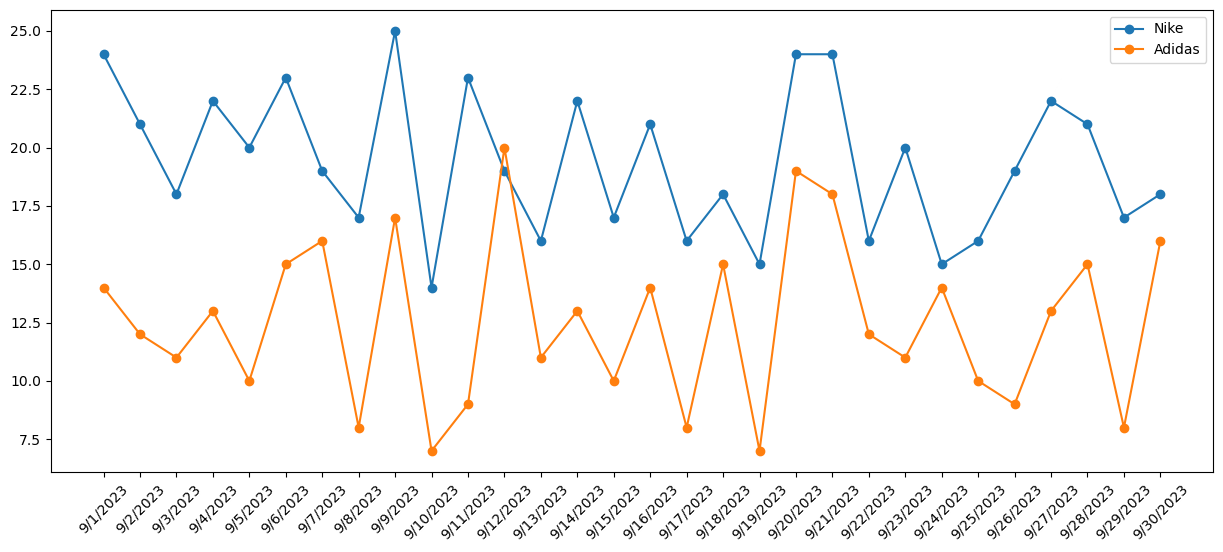

In [122]:
plt.figure(figsize=(15,6))

dates = nike_data['date']

plt.plot(dates, nike_data['sold_qty'], marker="o", label="Nike")
plt.plot(dates, adidas_data['sold_qty'], marker="o", label="Adidas")
plt.legend()
plt.xticks(rotation=45)

plt.show()
# nike_data


In [120]:
adidas_data = adidas_data.replace(adidas_data['sold_qty'].max(), 20)

In [121]:
adidas_data['sold_qty'].max()

20.0